In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
import tensorflow_hub as hub

In [3]:
detector = hub.load("https://tfhub.dev/tensorflow/mask_rcnn/inception_resnet_v2_1024x1024/1")

In [ ]:
im = cv.imread('1.jpeg')

In [5]:
detector_output = detector([im])
class_ids = detector_output["detection_classes"]

In [6]:
class_ids

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[ 3.,  1.,  1.,  1.,  1.,  1.,  8.,  3.,  1.,  3.,  3.,  3.,  1.,
         3.,  1.,  1.,  1.,  1.,  3.,  4.,  1.,  1.,  3.,  1.,  1.,  1.,
         1.,  1.,  1.,  3.,  1.,  1.,  1.,  1.,  1.,  3.,  3., 31.,  1.,
        67.,  3.,  3., 14.,  1., 16.,  3., 27., 16., 85., 18.,  1., 62.,
        32., 27.,  1.,  3.,  3.,  3.,  3.,  1.,  3.,  6.,  3.,  3., 16.,
         1.,  3.,  3.,  1., 14.,  3., 44.,  3.,  1., 15., 16., 85., 62.,
        77., 31.,  3.,  3.,  3.,  3.,  3., 62.,  3.,  3.,  1.,  3.,  3.,
         3.,  3.,  3., 88., 16., 27., 75., 85.,  1.]], dtype=float32)>

In [14]:
[(i,v.shape) for i,v in detector_output.items()]

[('anchors', TensorShape([49152, 4])),
 ('box_classifier_features', TensorShape([300, 9, 9, 1536])),
 ('class_predictions_with_background', TensorShape([300, 91])),
 ('detection_anchor_indices', TensorShape([1, 100])),
 ('detection_boxes', TensorShape([1, 100, 4])),
 ('detection_classes', TensorShape([1, 100])),
 ('detection_masks', TensorShape([1, 100, 33, 33])),
 ('detection_multiclass_scores', TensorShape([1, 100, 91])),
 ('detection_scores', TensorShape([1, 100])),
 ('final_anchors', TensorShape([1, 300, 4])),
 ('image_shape', TensorShape([4])),
 ('mask_predictions', TensorShape([100, 90, 33, 33])),
 ('num_detections', TensorShape([1])),
 ('num_proposals', TensorShape([1])),
 ('proposal_boxes', TensorShape([1, 300, 4])),
 ('proposal_boxes_normalized', TensorShape([1, 300, 4])),
 ('raw_detection_boxes', TensorShape([1, 300, 4])),
 ('raw_detection_scores', TensorShape([1, 300, 91])),
 ('refined_box_encodings', TensorShape([300, 90, 4])),
 ('rpn_box_encodings', TensorShape([1, 49152, 

In [12]:
detector_output['class_predictions_with_background'].shape

TensorShape([300, 91])

In [23]:
ymin, xmin, ymax, xmax = detector_output['detection_boxes'][0][0]

In [45]:
a,b,c,d = detector_output['detection_boxes'][0][0].numpy()
a,b,c,d

(0.37303644, 0.30994964, 0.7934968, 0.9398824)

In [18]:
np.argmax(detector_output['detection_scores'][0])

0

In [20]:
np.round(detector_output['detection_scores'],2)

array([[1.  , 0.07, 0.05, 0.03, 0.01, 0.01, 0.01, 0.01, 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  ]], dtype=float32)

In [28]:
ymin*im.shape[1], xmin*im.shape[0], ymax*im.shape[1], xmax*im.shape[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=239.4894>,
 <tf.Tensor: shape=(), dtype=float32, numpy=111.891815>,
 <tf.Tensor: shape=(), dtype=float32, numpy=509.42493>,
 <tf.Tensor: shape=(), dtype=float32, numpy=339.29755>)

In [25]:
im.shape[0]

(361, 642, 3)

In [30]:
start_point = (111, 229)
  
# Ending coordinate, here (220, 220)
# represents the bottom right corner of rectangle
end_point = (339, 509)
  
# Blue color in BGR
color = (255, 0, 0)
  
# Line thickness of 2 px
thickness = 2
  
# Using cv2.rectangle() method
# Draw a rectangle with blue line borders of thickness of 2 px
image = cv.rectangle(im, start_point, end_point, color, thickness)

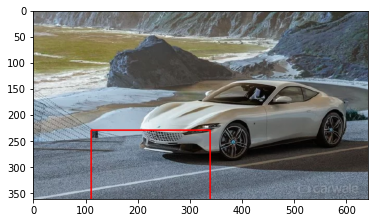

In [31]:
plt.imshow(image)

In [41]:
for i in range(100):
    ymin, xmin, ymax, xmax = detector_output['detection_boxes'][0][i].numpy()
    ymin, xmin, ymax, xmax = ymin*im.shape[1], xmin*im.shape[0], ymax*im.shape[1], xmax*im.shape[0]

    start_point = (xmin, ymin)
  
# Ending coordinate, here (220, 220)
# represents the bottom right corner of rectangle
    end_point = (xmax, ymax)
    
    # Blue color in BGR
    color = (255, 0, 0)
    
    # Line thickness of 2 px
    thickness = 2
    
    # Using cv2.rectangle() method
    # Draw a rectangle with blue line borders of thickness of 2 px
    image = cv.rectangle(im, start_point, end_point, color, thickness)

    plt.imshow(image)
    clear_output()



error: OpenCV(4.5.3) :-1: error: (-5:Bad argument) in function 'rectangle'
> Overload resolution failed:
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type
>  - Can't parse 'rec'. Expected sequence length 4, got 2
>  - Can't parse 'rec'. Expected sequence length 4, got 2


In [37]:
from IPython.display import clear_output